In [1]:
from LDA_function import tf, my_lda_func

import nltk
from nltk.corpus import reuters
import matplotlib.pyplot as plt

%matplotlib inline

nltk.download('reuters')
plt.style.use('ggplot')

[nltk_data] Downloading package reuters to /home/lyann/nltk_data...
[nltk_data]   Package reuters is already up-to-date!


## Small test data (d1 to d5)

In [5]:
# Sample data for analysis
d1 = "Java is a language for programming that develops a software for several platforms. A compiled code or bytecode on Java application can run on most of the operating systems including Linux, Mac operating system, and Linux. Most of the syntax of Java is derived from the C++ and C languages."
d2 = "Python supports multiple programming paradigms and comes up with a large standard library, paradigms included are object-oriented, imperative, functional and procedural."
d3 = "Go is typed statically compiled language. It was created by Robert Griesemer, Ken Thompson, and Rob Pike in 2009. This language offers garbage collection, concurrency of CSP-style, memory safety, and structural typing."
d4 = "A young girl when she first visited magical Underland, Alice Kingsleigh (Mia Wasikowska) is now a teenager with no memory of the place -- except in her dreams."
d5 = "Her life takes a turn for the unexpected when, at a garden party for her fiance and herself, she spots a certain white rabbit and tumbles down a hole after him. Reunited with her friends the Mad Hatter (Johnny Depp), the Cheshire Cat and others, Alice learns it is her destiny to end the Red Queen's (Helena Bonham Carter) reign of terror."

In [6]:
# Using slow version tf_df
tf_df, id2word = tf([d1, d2, d3, d4, d5])

lil = []
for row in tf_df.values:
    lil_sub = []
    for idx, item in enumerate(row):
        if item:
            lil_sub.append((idx, item))
    lil.append(lil_sub)
    
shown, gamma_by_chunks = my_lda_func(corpus=lil, num_topics=2, id2word=id2word, topics_only=False, num_words=10, verbose=False, passes=10)

In [7]:
shown

[(0,
  '0.023*"language" + 0.014*"alice" + 0.014*"memory" + 0.014*"compiled" + 0.014*"concurrency" + 0.014*"go" + 0.014*"safety" + 0.014*"griesemer" + 0.014*"collection" + 0.014*"csp"'),
 (1,
  '0.032*"java" + 0.023*"operating" + 0.023*"linux" + 0.023*"paradigms" + 0.023*"c" + 0.023*"programming" + 0.014*"language" + 0.014*"compiled" + 0.014*"systems" + 0.014*"mac"')]

In [8]:
gamma_by_chunks

[array([[ 0.535058  , 27.464712  ],
        [23.45903   ,  0.54073775],
        [ 0.51975805, 16.480085  ],
        [ 0.5485878 , 15.451246  ],
        [33.473766  ,  0.52588606]], dtype=float32),
 array([[ 0.535058  , 27.464712  ],
        [23.45903   ,  0.54073775],
        [ 0.51975805, 16.480085  ],
        [ 0.5485878 , 15.451246  ],
        [33.473766  ,  0.52588606]], dtype=float32),
 array([[ 0.535058  , 27.464712  ],
        [23.45903   ,  0.54073775],
        [ 0.51975805, 16.480085  ],
        [ 0.5485878 , 15.451246  ],
        [33.473766  ,  0.52588606]], dtype=float32),
 array([[ 0.535058  , 27.464712  ],
        [23.45903   ,  0.54073775],
        [ 0.51975805, 16.480085  ],
        [ 0.5485878 , 15.451246  ],
        [33.473766  ,  0.52588606]], dtype=float32),
 array([[ 0.535058  , 27.464712  ],
        [23.45903   ,  0.54073775],
        [ 0.51975805, 16.480085  ],
        [ 0.5485878 , 15.451246  ],
        [33.473766  ,  0.52588606]], dtype=float32)]

## Simulated Data (Sleep & Vaccine Policy)

In [9]:
sleep = pd.read_csv('sleep_diet_exercise.csv', header=None)

In [10]:
docs = [i[0] for i in sleep.values]
len(docs)

30

In [11]:
tf_df, id2word = tf(docs)

lil = []
for row in tf_df.values:
    lil_sub = []
    for idx, item in enumerate(row):
        if item:
            lil_sub.append((idx, item))
    lil.append(lil_sub)
    
simu_result = my_lda_func(corpus=lil, num_topics=2, id2word=id2word, num_words=10, chunksize=20, passes=10, verbose=False)

In [12]:
simu_result

[(0,
  '0.053*"sleep" + 0.013*"exercise" + 0.009*"activity" + 0.007*"physical" + 0.007*"adults" + 0.007*"studies" + 0.006*"health" + 0.006*"night" + 0.006*"daytime" + 0.006*"insomnia"'),
 (1,
  '0.016*"biden" + 0.013*"tax" + 0.008*"president" + 0.007*"vaccine" + 0.007*"income" + 0.007*"administration" + 0.006*"pandemic" + 0.005*"americans" + 0.005*"according" + 0.005*"covid"')]

In [13]:
def parse_result(result):
    """
    This function is used to reorganize the result of my_lda_func.
    """
    result_dic = {}
    for topic_num, dist in result:
        unpack = []
        for obj in dist.split('+'):
            prob, word = obj.split('*')
            unpack.append((float(prob), word.strip().strip('"')))
        prob, word = zip(*unpack)
        result_dic[topic_num] = [prob, word]
    return result_dic

In [14]:
# Parsed result for simulated data
simulated_data_result = parse_result(simu_result)
simulated_data_result

{0: [(0.053, 0.013, 0.009, 0.007, 0.007, 0.007, 0.006, 0.006, 0.006, 0.006),
  ('sleep',
   'exercise',
   'activity',
   'physical',
   'adults',
   'studies',
   'health',
   'night',
   'daytime',
   'insomnia')],
 1: [(0.016, 0.013, 0.008, 0.007, 0.007, 0.007, 0.006, 0.005, 0.005, 0.005),
  ('biden',
   'tax',
   'president',
   'vaccine',
   'income',
   'administration',
   'pandemic',
   'americans',
   'according',
   'covid')]}

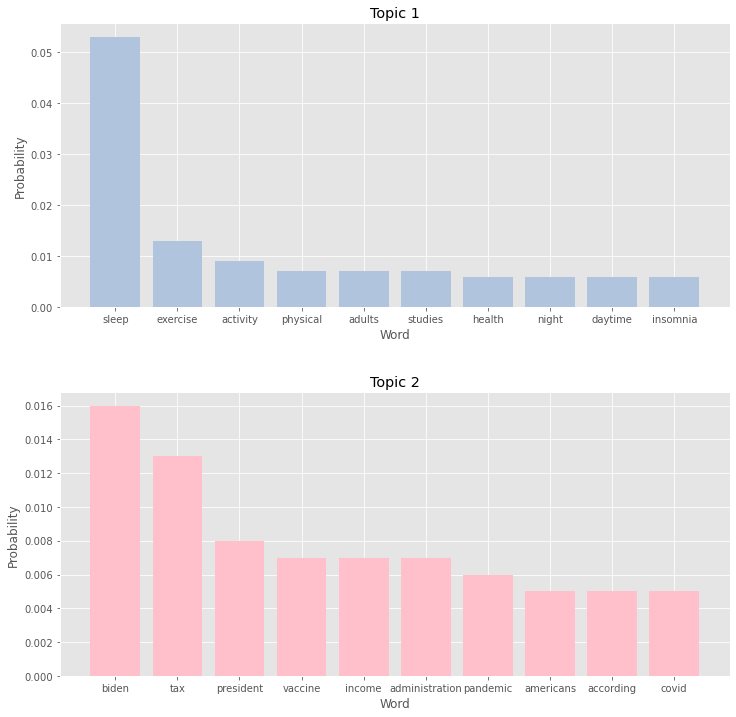

In [15]:
# Bar plots for simulated data
fig, axs = plt.subplots(2, 1, figsize=(12, 12))
cmap = ['lightsteelblue', 'pink', 'darkgrey', 'khaki', 'lightsalmon', 'darkseagreen']

# make a little extra space between the subplots
fig.subplots_adjust(hspace=0.3)
simu_dic = parse_result(simu_result)

for idx, ax in enumerate(axs):
    probability, words = simu_dic[idx]

    ax.bar(words, probability, color=cmap[idx])
    ax.set_xlabel("Word")
    ax.set_ylabel("Probability")
    ax.set_title(f"Topic {idx+1}")

# plt.savefig('figures/simulated_data_result.jpg')
plt.show()

## Real-world Data 1: Reuters

In [16]:
np.random.seed(1)
ntotal=1000
documents = reuters.fileids()
documents=np.random.choice(documents,ntotal)
docs=[reuters.raw(d) for d in documents]

In [17]:
len(docs)

1000

In [18]:
tf_df, id2word = tf(docs)

lil = []
for row in tf_df.values:
    lil_sub = []
    for idx, item in enumerate(row):
        if item:
            lil_sub.append((idx, item))
    lil.append(lil_sub)
    
real_result_1 = my_lda_func(corpus=lil, num_topics=4, id2word=id2word, num_words=10, chunksize=20, passes=10)

In [19]:
# Parsed result for real data 1 from Reuters
reuters_data_result = parse_result(real_result_1)
reuters_data_result

{0: [(0.02, 0.017, 0.016, 0.015, 0.011, 0.01, 0.01, 0.009, 0.008, 0.007),
  ('lt',
   'dlrs',
   'stock',
   'company',
   'inc',
   'shares',
   'pct',
   'mln',
   'co',
   'share')],
 1: [(0.01, 0.009, 0.007, 0.007, 0.006, 0.006, 0.006, 0.006, 0.005, 0.005),
  ('japan',
   'trade',
   'ec',
   'exchange',
   'officials',
   'sugar',
   'states',
   'meeting',
   'president',
   'market')],
 2: [(0.073, 0.066, 0.043, 0.037, 0.037, 0.025, 0.022, 0.017, 0.016, 0.014),
  ('vs', 'mln', 'cts', 'net', 'dlrs', 'loss', 'shr', 'lt', 'profit', 'year')],
 3: [(0.023, 0.017, 0.015, 0.014, 0.009, 0.008, 0.008, 0.007, 0.007, 0.007),
  ('pct',
   'mln',
   'year',
   'billion',
   'tonnes',
   'bank',
   'last',
   'dlrs',
   'february',
   'prices')]}

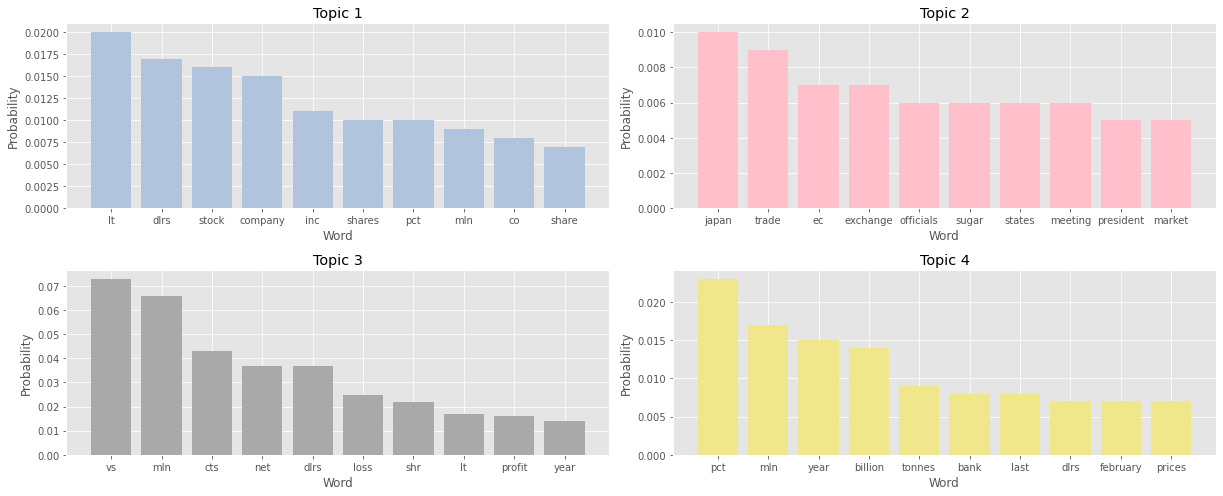

In [20]:
# Bar plots for simulated data
fig, axs = plt.subplots(2, 2, figsize=(17, 7))
cmap = ['lightsteelblue', 'pink', 'darkgrey', 'khaki', 'lightsalmon', 'darkseagreen']

# make a little extra space between the subplots
real_result_1_dic = parse_result(real_result_1)

for idx, ax in enumerate(axs.ravel()):
    probability, words = real_result_1_dic[idx]

    ax.bar(words, probability, color=cmap[idx])
    ax.set_xlabel("Word")
    ax.set_ylabel("Probability")
    ax.set_title(f"Topic {idx+1}")

plt.tight_layout()
# plt.savefig('figures/reuters_data_result.jpg')
plt.show()

## Real-world Data 2: Tweet

In [21]:
# Real world sample data
raw_tweets = pd.read_csv('clean_tweets.csv')

tweets_list = raw_tweets.Tweets.values.tolist()

len(tweets_list)

6000

In [22]:
tf_df, id2word = tf(tweets_list)

lil = []
for row in tf_df.values:
    lil_sub = []
    for idx, item in enumerate(row):
        if item:
            lil_sub.append((idx, item))
    lil.append(lil_sub)

In [23]:
real_result_2 = my_lda_func(corpus=lil, num_topics=6, id2word=id2word, num_words=10, chunksize=100, verbose=False, passes=10)

In [24]:
# Parsed result for real data 2 from Tweet
tweet_data_result = parse_result(real_result_2)
tweet_data_result

{0: [(0.01, 0.009, 0.008, 0.008, 0.007, 0.006, 0.006, 0.006, 0.006, 0.005),
  ('today',
   'new',
   'great',
   'work',
   'need',
   'good',
   'business',
   'learn',
   'way',
   'change')],
 1: [(0.088, 0.081, 0.063, 0.049, 0.041, 0.037, 0.036, 0.032, 0.026, 0.02),
  ('follow',
   'check',
   'automatically',
   'people',
   'unfollowed',
   'today',
   'person',
   'pisce',
   'arie',
   'follower')],
 2: [(0.038, 0.017, 0.016, 0.015, 0.013, 0.013, 0.01, 0.009, 0.009, 0.008),
  ('thank',
   'new',
   'great',
   'love',
   'day',
   'video',
   'today',
   'year',
   'good',
   'look')],
 3: [(0.015, 0.015, 0.012, 0.011, 0.01, 0.008, 0.008, 0.008, 0.007, 0.007),
  ('good',
   'go',
   'think',
   'time',
   'know',
   'look',
   'day',
   'love',
   'need',
   'come')],
 4: [(0.017, 0.009, 0.009, 0.006, 0.005, 0.005, 0.005, 0.005, 0.005, 0.004),
  ('trump',
   'say',
   'people',
   'think',
   'right',
   'know',
   'vote',
   'need',
   'woman',
   'country')],
 5: [(0.02, 0.00

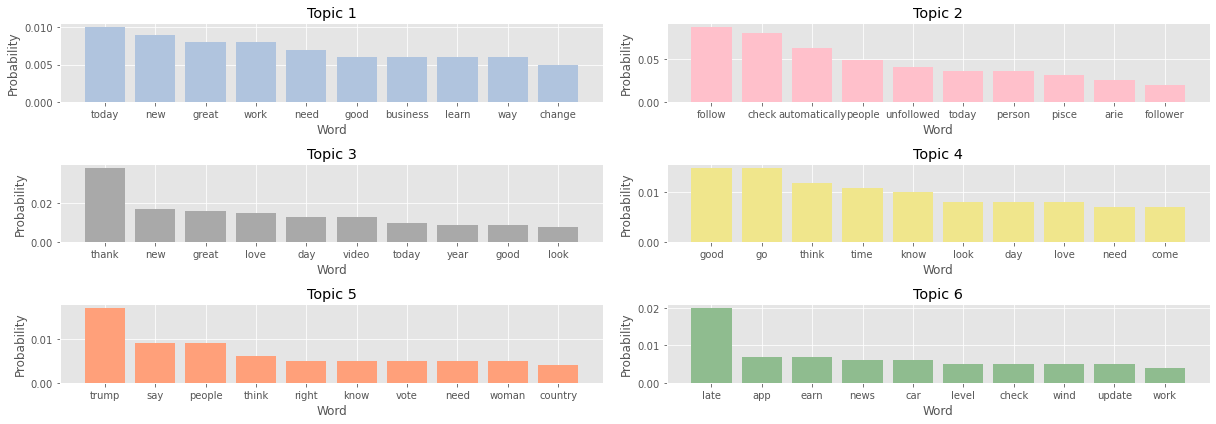

In [25]:
# Bar plots for simulated data
fig, axs = plt.subplots(3, 2, figsize=(17, 6))
cmap = ['lightsteelblue', 'pink', 'darkgrey', 'khaki', 'lightsalmon', 'darkseagreen']

# make a little extra space between the subplots
real_result_2_dic = parse_result(real_result_2)

for idx, ax in enumerate(axs.ravel()):
    probability, words = real_result_2_dic[idx]

    ax.bar(words, probability, color=cmap[idx])
    ax.set_xlabel("Word")
    ax.set_ylabel("Probability")
    ax.set_title(f"Topic {idx+1}")

plt.tight_layout()
# plt.savefig('figures/tweet_data_result.jpg')
plt.show()